In [ ]:
#one-hot-encoding을 써야할거여~ 등급맞추기

https://github.com/coalastudy/data-science-lv1/blob/master/week6/wine.ipynb

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy  as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [4]:
df = pd.read_csv('../dataset/wine.csv',header=None)

dataset = df.values
X = dataset[:,0:11]
Y = dataset[:,11]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [6]:
model = Sequential()
model.add(Dense(30, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

W0813 17:30:35.928571  4920 deprecation_wrapper.py:119] From C:\Users\709-000\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 17:30:35.929571  4920 deprecation_wrapper.py:119] From C:\Users\709-000\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 17:30:35.931571  4920 deprecation_wrapper.py:119] From C:\Users\709-000\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 17:30:35.971576  4920 deprecation_wrapper.py:119] From C:\Users\709-000\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [8]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1,save_best_only=True)

In [11]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100) 

In [25]:
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,
                   verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.50304

Epoch 00002: val_loss did not improve from 0.50304

Epoch 00003: val_loss did not improve from 0.50304

Epoch 00004: val_loss did not improve from 0.50304

Epoch 00005: val_loss did not improve from 0.50304

Epoch 00006: val_loss did not improve from 0.50304

Epoch 00007: val_loss did not improve from 0.50304

Epoch 00008: val_loss did not improve from 0.50304

Epoch 00009: val_loss did not improve from 0.50304

Epoch 00010: val_loss did not improve from 0.50304

Epoch 00011: val_loss did not improve from 0.50304

Epoch 00012: val_loss did not improve from 0.50304

Epoch 00013: val_loss did not improve from 0.50304

Epoch 00014: val_loss did not improve from 0.50304

Epoch 00015: val_loss did not improve from 0.50304

Epoch 00016: val_loss did not improve from 0.50304

Epoch 00017: val_loss did not improve from 0.50304

Epoch 00018: val_loss did not improve from 0.50304

Epoch 00019: val_loss did not improve from 0.50304

Epoch 00020

In [26]:
# 모델의 학습이 어느 정도 되었는지 확인하기 위해 
# 예측 값과 실제 값을 비교하는 부분을 추가한다.

Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제등급:{:.3f},예상등급:{:.3f}".format(label,prediction))

실제등급:6.000,예상등급:5.522
실제등급:6.000,예상등급:6.546
실제등급:6.000,예상등급:5.608
실제등급:5.000,예상등급:4.805
실제등급:8.000,예상등급:6.230
실제등급:5.000,예상등급:5.811
실제등급:6.000,예상등급:6.345
실제등급:6.000,예상등급:5.439
실제등급:6.000,예상등급:6.164
실제등급:6.000,예상등급:6.237


In [27]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

In [28]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

<function matplotlib.pyplot.show(*args, **kw)>

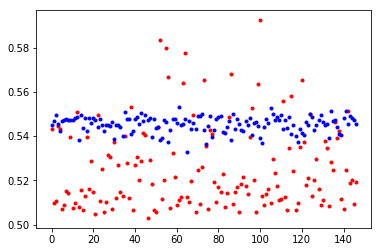

In [29]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c= "blue",markersize=3)

plt.show